In [2]:
import numpy as np
import matplotlib.pyplot as plt

### Generating some data

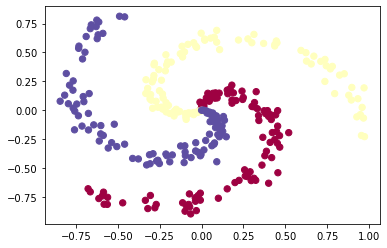

In [3]:
N = 100 # number of points per class
D = 2 # dimensionality
K = 3 # number of classes
X = np.zeros((N*K,D)) # data matrix (each row = single example)
y = np.zeros(N*K, dtype='uint8') # class labels

N = 100 # number of points per class
D = 2 # dimensionality
K = 3 # number of classes
X = np.zeros((N*K,D)) # data matrix (each row = single example)
y = np.zeros(N*K, dtype='uint8') # class labels
for j in range(K):
  ix = range(N*j,N*(j+1))
  r = np.linspace(0.0,1,N) # radius
  t = np.linspace(j*4,(j+1)*4,N) + np.random.randn(N)*0.2 # theta
  X[ix] = np.c_[r*np.sin(t), r*np.cos(t)]
  y[ix] = j
# lets visualize the data:
plt.scatter(X[:, 0], X[:, 1], c=y, s=40, cmap=plt.cm.Spectral)
plt.show()

### The features are already in a nice range from -1 to 1, so we skip the preprocessing step

## Training a Softmax Linear Classifier

### Initialize the parameters

In [4]:
W = np.random.randn(D, K)
b = np.zeros((1, K))

# some hyperparameters
step_size = 1e-0
reg = 1e-3 # regularization strength

### Compute the class scores

In [5]:
# compute class scores for a linear classifier
scores = np.dot(X, W) + b

### Compute the loss

In [6]:
num_examples = X.shape[0]
# get unnormalized probabilities
exp_scores = np.exp(scores)
# normalize them for each example
probs = exp_scores / np.sum(exp_scores, axis=1, keepdims=True)

In [10]:
# We can now query for the log probabilities assigned to the correct classes in each example
correct_logprobs = -np.log(probs[range(num_examples),y])

In [16]:
# The full loss is then the average of these log probabilities and the regularization loss:

# compute the loss: average cross-entropy loss and regularization
data_loss = np.sum(correct_logprobs)/num_examples
reg_loss = 0.5*reg*np.sum(W*W)
loss = data_loss + reg_loss

## Computing the Analytic gradient with Backpropagation

In [131]:
dscores = scores
dscores[range(num_examples), y] -= 1
dscores /= num_examples

In [132]:
dW = np.dot(X.T, dscores)
db = np.sum(dscores, axis=0, keepdims=True)
dW += reg*W # don't forget the regularization gradient

### Performing a parameter update

In [133]:
W += -step_size * dW
b += -step_size * reg

# Putting it all together
# Training a Softmax Classifier

In [137]:
# train a linear classifier

# initialize parameters randomly
W = 0.01 * np.random.randn(D, K)
b = 0.01 * np.zeros((1, K))

# some hyperparameters
step_size = 1e-0
reg = 1e-3 # regularization strength

# gradient descent loop
num_examples = X.shape[0]
for i in range(200):
    
    # evaluate class scores, [N x K]
    scores = np.dot(X, W) + b
    
    # compute the class probabilities
    exp_scores = np.exp(scores)
    probs = exp_scores / np.sum(exp_scores, axis = 1, keepdims=True) # [N x K]
    
    # compute the loss: average cross entropy loss and regularization
    correct_logprobs = -np.log(probs[range(num_examples), y])
    data_loss = np.sum(correct_logprobs) / num_examples
    reg_loss = 0.5 * reg * np.sum(W * W)
    loss = data_loss + reg_loss
    if i % 10 == 0:
        print("iteration %d: loss is: %f"  % (i, loss))
    
    # compute the gradient on scores
    dscores = probs
    dscores[range(num_examples), y] -= 1
    dscores /= num_examples
    
    # backpropagate the gradient to the parameters (W, b)
    dW = np.dot(X.T, dscores)
    db = np.sum(dscores, axis = 0, keepdims=True)
    
    dW += reg*W # regularization gradient
    
    # perform a parameter update
    W += -step_size * dW
    b += -step_size * db
    
    

iteration 0: loss is: 1.100000
iteration 10: loss is: 0.909702
iteration 20: loss is: 0.838871
iteration 30: loss is: 0.806497
iteration 40: loss is: 0.789531
iteration 50: loss is: 0.779809
iteration 60: loss is: 0.773886
iteration 70: loss is: 0.770117
iteration 80: loss is: 0.767638
iteration 90: loss is: 0.765967
iteration 100: loss is: 0.764819
iteration 110: loss is: 0.764017
iteration 120: loss is: 0.763450
iteration 130: loss is: 0.763046
iteration 140: loss is: 0.762755
iteration 150: loss is: 0.762543
iteration 160: loss is: 0.762389
iteration 170: loss is: 0.762277
iteration 180: loss is: 0.762194
iteration 190: loss is: 0.762132


# Evaluate training set accuracy

In [139]:
scores = np.dot(X, W) + b
predicted_class = np.argmax(scores, axis=1)
print('training accuracy: %.2f' % (np.mean(predicted_class == y)))

training accuracy: 0.52


In [142]:
def predict(X):
    scores = np.dot(X, W) + b
    return np.argmax(scores, axis=1)

In [10]:
def plot_decision_boundary(pred_func):
    # Set min and max values and give it some padding
    x_min, x_max = X[:, 0].min() - .5, X[:, 0].max() + .5
    y_min, y_max = X[:, 1].min() - .5, X[:, 1].max() + .5
    h = 0.01
    # Generate a grid of points with distance h between them
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
    # Predict the function value for the whole gid
    Z = pred_func(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    # Plot the contour and training examples
    plt.contourf(xx, yy, Z, cmap=plt.cm.Spectral)
    plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.Spectral)

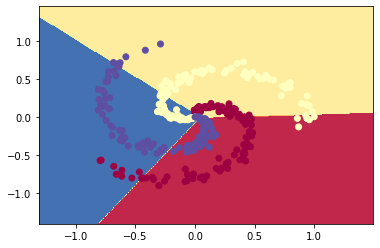

In [144]:
plot_decision_boundary(lambda X: predict(X))

# Training a Neural Network

In [6]:
# initalize parameters randomly
h = 20 # size of a hidden layer
W = 0.01 * np.random.randn(D, h)
b = np.zeros((1, h))
W2 = 0.01 * np.random.randn(h, K)
b2 = np.zeros((1, K))

In [147]:
# evaluate class scores with a 2-layer NN
hidden_layer = np.maximum(0, np.dot(X, W) + b) # note, RelU activation
scores = np.dot(hidden_layer, W2) + b2

In [ ]:
# backpropagate the gradient to the parameters
# first backprop into parameters W2 and b2
dW2 = np.dot(hidden_layer.T, dscores)
db2 = np.sum(dscores, axis = 0, keepdims=True)

In [ ]:
# gradient of the hidden layer
dhidden = np.dot(dscores, W2.T)

In [ ]:
# backprop the RelU non-linearity
dhidden[hidden_layer <= 0] = 0

In [ ]:
# finally into W, b
dW = np.dot(X.T, dhidden)
db = np.sum(dhidden, axis = 0, keepdims=True)

In [8]:
# initialize parameters randomly
h = 100 # size of hidden layer
W = 0.01 * np.random.randn(D,h)
b = np.zeros((1,h))
W2 = 0.01 * np.random.randn(h,K)
b2 = np.zeros((1,K))

# some hyperparameters
step_size = 1e-0
reg = 1e-3 # regularization strength

# gradient descent loop
num_examples = X.shape[0]
for i in range(10000):

    # evaluate class scores, [N x K]
    hidden_layer = np.maximum(0, np.dot(X, W) + b) # note, ReLU activation
    scores = np.dot(hidden_layer, W2) + b2

    # compute the class probabilities
    exp_scores = np.exp(scores)
    probs = exp_scores / np.sum(exp_scores, axis=1, keepdims=True) # [N x K]

    # compute the loss: average cross-entropy loss and regularization
    correct_logprobs = -np.log(probs[range(num_examples),y])
    data_loss = np.sum(correct_logprobs)/num_examples
    reg_loss = 0.5*reg*np.sum(W*W) + 0.5*reg*np.sum(W2*W2)
    loss = data_loss + reg_loss
    if i % 1000 == 0:
        print("iteration %d: loss %f" % (i, loss))

    # compute the gradient on scores
    dscores = probs
    dscores[range(num_examples),y] -= 1
    dscores /= num_examples
    
    # backpropate the gradient to the parameters
    # first backprop into parameters W2 and b2
    dW2 = np.dot(hidden_layer.T, dscores)
    db2 = np.sum(dscores, axis=0, keepdims=True)
    
    # next backprop into hidden layer
    dhidden = np.dot(dscores, W2.T)
    # backprop the ReLU non-linearity
    dhidden[hidden_layer <= 0] = 0
    
    # finally into W,b
    dW = np.dot(X.T, dhidden)
    db = np.sum(dhidden, axis=0, keepdims=True)
    
    # add regularization gradient contribution
    dW2 += reg * W2
    dW += reg * W
    
    # perform a parameter update
    W += -step_size * dW
    b += -step_size * db
    W2 += -step_size * dW2
    b2 += -step_size * db2

iteration 0: loss 1.098496
iteration 1000: loss 0.336539
iteration 2000: loss 0.262248
iteration 3000: loss 0.256415
iteration 4000: loss 0.255111
iteration 5000: loss 0.254581
iteration 6000: loss 0.254104
iteration 7000: loss 0.253191
iteration 8000: loss 0.252912
iteration 9000: loss 0.252747


In [9]:
# evaluate training set accuracy
hidden_layer = np.maximum(0, np.dot(X, W) + b)
scores = np.dot(hidden_layer, W2) + b2
predicted_class = np.argmax(scores, axis=1)
print('training accuracy: %.2f' % (np.mean(predicted_class == y)))

training accuracy: 0.99


In [11]:
def predict_nn(X):
    hidden_layer = np.maximum(0, np.dot(X, W) + b)
    scores = np.dot(hidden_layer, W2) + b2
    return np.argmax(scores, axis=1)

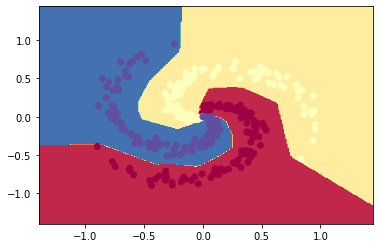

In [12]:
plot_decision_boundary(lambda X: predict_nn(X))

In [8]:
np.shape(y)

(300,)

a1 = [ones(m,1), X];

z2 = a1*Theta1';
a2 = [ones(m,1), sigmoid(z2)];

z3 = a2*Theta2';
a3 = sigmoid(z3);

d3 = a3-y_vec;
Delta2 = d3'*a2;

d2 = d3*Theta2(:,2:end).*sigmoidGradient(z2);
Delta1 = d2'*a1;


Theta1_grad = Delta1./m;
Theta2_grad = Delta2./m;

Theta1_grad(:,2:end)=Theta1_grad(:,2:end) + lambda/m*(Theta1(:,2:end));
Theta2_grad(:,2:end)=Theta2_grad(:,2:end) + lambda/m*(Theta2(:,2:end));
